## Probability Mass Functions

*Coding along with third edition of the online version of __[Think Stats](https://allendowney.github.io/ThinkStats/chap03.html)__ by Allen Downey.*

In this chapter we'll introduce a probability mass function (PMF) to describe a distribution. A PMF contains a set of quantities and their probabilities.

A __probability mass function (PMF)__ describes the probability of each possible value occurring in a discrete random variable.

Key characteristics:
- Only applies to discrete variables (countable values like dice rolls, number of children)
- For each possible value x, PMF(x) gives its probability of occurring
- All probabilities must be between 0 and 1
- Sum of all probabilities must equal 1

For example, for a fair six-sided die:
- PMF(1) = 1/6
- PMF(2) = 1/6
- And so on for each value
- No probability for values like 1.5 or 7
- Total probability = 1/6 + 1/6 + ... + 1/6 = 1

This __differs from probability density functions (PDFs)__ which are used for continuous variables where individual point probabilities are zero.

*(Source: Claude.ai)*

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate
from empiricaldist import Hist
from empiricaldist import Pmf

## PMFs

A Pmf object is like a Hist that contains probabilities instead of frequencies. 

In [32]:
# creating a Pmf is from a Hist
# here's a Hist example that represents the distribution of values in a short sequence
hist = Hist.from_seq([1, 2, 2, 3, 5])
hist

,freqs
1,1
2,2
3,1
5,1


In [33]:
# the sum of the frequencies is the size of the original sequence
n = hist.sum()
n

np.int64(5)

In [34]:
# dividing the frequencies by n
pmf = hist / n
# now we have proportions (props) rather than counts
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


The proportions we're getting i.e. indicate that 20% of the values in the sequence are 1 and 40% are 2.

If we think of these proportions as probabilities then the probability that we we choose the value 1 is 0.2 and the probability that we choose the value 2 is 0.4.

If we choose a random value from the original sequence, the probability we choose the value 1 is 0.2, and so on.

*The sum of the probabilities is 1 which means that this distribution is __normalized__*.

A normalized `Hist` object represents a **probability mass function** (PMF). The name indicates that probabilities associated with discrete quantities are also called "probability masses".

In [35]:
# create a `Pmf` object directly with the `empiricaldist` library's `Pmf` functionality
pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [36]:
# the Pmf is normalized so the total probability is 1
pmf.sum()

np.float64(1.0)

In [37]:
# using the bracket operator to look up the probability associated with a value
pmf[2]

np.float64(0.4)

In [38]:
# assigning a probability to a quantity
pmf[2] = 0.2
pmf(2)

np.float64(0.2)

In [39]:
# modifying an existing Pmf by incrementing the probability associated with a value
pmf[2] += 0.3
pmf[2]

np.float64(0.5)

In [40]:
# multiplying a probability by a factor
pmf[2] *= 0.5
pmf[2]

np.float64(0.25)

In [41]:
# when modifying a `Pmf` the result may not be normalized
pmf.sum()

np.float64(0.8500000000000001)

In [42]:
# getting the pmf back on track with the `normalize` method 
# it "renormalizes" the `Pmf` by dividing through by the sum
pmf.normalize()

np.float64(0.8500000000000001)

In [43]:
pmf # let's check it

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


In [44]:
pmf.sum() # let's check the sum, should be 1.0 again

np.float64(1.0)

In [45]:
# make a copy to modify it without affecting the original
pmf.copy()

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


In [46]:
# a `Pmf` object has a `qs` attribute that accesses the quantities
pmf.qs

array([1, 2, 3, 5])

In [47]:
# a `Pmf` object has a `ps` attribute that accesses the probabilities
pmf.ps

array([0.23529412, 0.29411765, 0.23529412, 0.23529412])

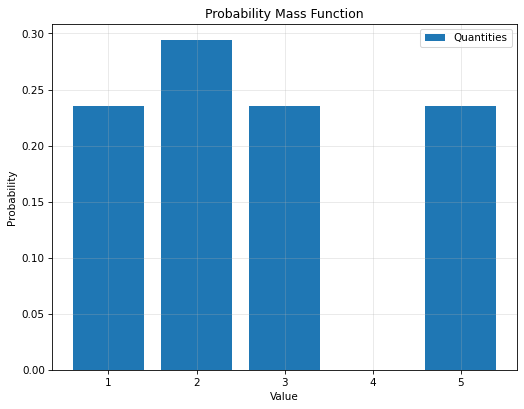

In [48]:
# how to use the bar method according to claude.ai
plt.figure(figsize=(8, 6))
pmf.bar(label='Quantities')
plt.title('Probability Mass Function')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

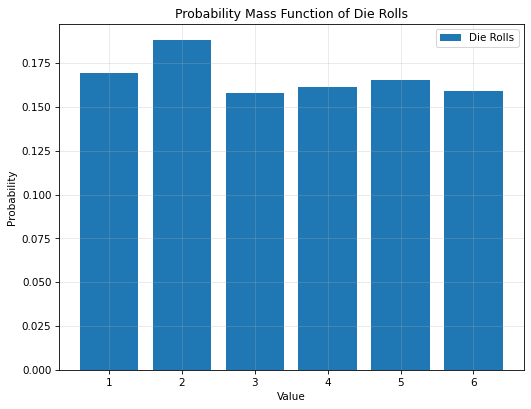

In [49]:
# another example that simulates rolling a fair six-sided die 1000 times
# create sample data - let's simulate rolling a die 1000 times
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=1000)

# create Pmf object from the data
pmf = Pmf.from_seq(rolls)

# create the bar plot
plt.figure(figsize=(8, 6))
pmf.bar(label='Die Rolls')

# customize the plot
plt.title('Probability Mass Function of Die Rolls')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

## Summary Statistics

In [51]:
# computing the mean of a sample by adding up the elements and dividing by n
seq = [1, 2, 2, 3, 5]
mean = np.sum(seq) / len(seq)
mean

np.float64(2.6)

In [52]:
# computing the PMF of the values in the sequence
pmf = Pmf.from_seq(seq)
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [53]:
# computing the mean from the pmf 
# process is different: we have to multiply the probabilities and quantities and add up the products
mean = np.sum(pmf.ps * pmf.qs)
mean

np.float64(2.6)

__We don't have to divide by n because we already did that when we normalized the Pmf.__

In [54]:
# pmf objects have a mean method that does the same thing
pmf.mean()

np.float64(2.6)

In [55]:
# computing the variance by (1) computing the deviation of each quantity from the mean
deviations = pmf.qs - mean
deviations

array([-1.6, -0.6,  0.4,  2.4])

In [57]:
# (2) then multiplying the squared deviations by the probabilities and add up the products
var = np.sum(pmf.ps * deviations**2)
var

np.float64(1.84)

In [60]:
# same with pmf.var()
pmf.var()

np.float64(1.84)

In [58]:
# computing the standard deviation from the variance
std = np.sqrt(var)
std

np.float64(1.3564659966250536)

In [61]:
# same with pmf.std()
pmf.std()

np.float64(1.3564659966250536)

In [62]:
# finding the value with the highest probability with the mode method
pmf.mode()

np.int64(2)

## The Class Size Paradox

The __class size paradox__ describes how students typically experience larger average class sizes than what administrators calculate. This occurs because students are more likely to be in larger classes, while administrators average across all classes regardless of size.

__Example__:
- Two classes: 50 students and 10 students
- Administrator calculation: Average = (50 + 10)/2 = 30 students
- Student perspective: 50 students experience size 50, 10 experience size 10
- ***Student-weighted average = (50×50 + 10×10)/(50 + 10) = 43.3 students***

*This connects to the **Probability Mass Function (PMF)** through weighted averaging*. The student-experienced average is effectively weighting the class sizes by the number of students (the "mass" at each size value), while the administrative average weights all classes equally regardless of size.

__Mathematically__:
- Administrative mean = Σ(class sizes)/n_classes
- ***Student-experienced mean = Σ(size × number_of_students)/total_students***

This demonstrates how different sampling methods and weightings can lead to systematically different averages of the same underlying distribution.

*(Source: Claude.ai)*

In [65]:
# python example
# suppose that a college offers 65 classes in a given semester
# we are given the number of classes in each of the following size ranges
# the Pandas function interval_range creates an Index where each label represents a range of values
# the notation [5, 10) means that 5 is included in the interval and 10 is not
ranges = pd.interval_range(start=5, end=50, freq=5, closed="left")
print(ranges)
ranges.name = "class size"

IntervalIndex([ [5, 10), [10, 15), [15, 20), [20, 25), [25, 30), [30, 35),
               [35, 40), [40, 45), [45, 50)],
              dtype='interval[int64, left]')


In [66]:
data = pd.DataFrame(index=ranges)
data["count"] = [8, 8, 14, 4, 6, 12, 8, 3, 2] # number of classes in each interval
data

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


In [67]:
data["count"].sum()

np.int64(65)

In [68]:
# now let's assume we don't know the sizes of the classes in each interval
# further let's assume that all sizes are at the midpoint of the range
sizes = ranges.left + 2
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

In [70]:
# creating a Pmf that represents the distribution of class sizes
# because we know the sizes and their frequencies, we can create a Pmf directly, 
# passing as arguments the counts, sizes, and a name
counts = data["count"]
actual_pmf = Pmf(counts, sizes, name="actual")
actual_pmf

,probs
7,8
12,8
17,14
22,4
27,6
32,12
37,8
42,3
47,2


In [71]:
# when we normalize the new Pmf, the result is the sum of the counts
actual_pmf.normalize()

np.int64(65)

In [72]:
# if you ask the college for the average class size
# they report the mean of this distribution, which is 23.7
actual_pmf.mean()

np.float64(23.692307692307693)

__Now let's take another approach and survey a group of students.__ We ask them how many students are in their classes and compute the mean.

In [75]:
# function that takes the actual Pmf of class sizes 
# and makes a new Pmf that represents the class sizes as seen by students
def bias(pmf, name):
    # the quantities in the two distributions are the same
    # but the probabilities in the distribution are multiplied by the quantities, 
    # because in a class with size `x`, there are `x` students who observe that class
    
    # multiply each probability by class size
    ps = pmf.ps * pmf.qs
    # make a new Pmf and normalize it
    new_pmf = Pmf(ps, pmf.qs, name=name)
    # the probability of observing a class is now proportional to its size
    new_pmf.normalize()
    return new_pmf

In [74]:
# computing the biased Pmf as observed by students
observed_pmf = bias(actual_pmf, name="observed")
observed_pmf

,probs
7,0.036364
12,0.062338
17,0.154545
22,0.057143
27,0.105195
32,0.249351
37,0.192208
42,0.081818
47,0.061039


In [76]:
observed_pmf.normalize()

np.float64(1.0)

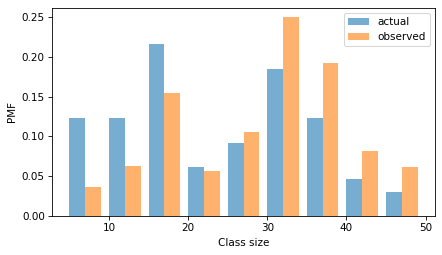

In [78]:
# plotting the two distributions look like
from thinkstats import two_bar_plots

two_bar_plots(actual_pmf, observed_pmf, width=2)
decorate(xlabel="Class size", ylabel="PMF")

In [79]:
observed_pmf.mean()

np.float64(29.123376623376622)

***Interpretaion from the book**: In the observed distribution there are fewer small classes and more large ones. 
<br>The __biased mean__ is 29.1, almost 25% higher than the actual mean.*

#### __Estimating an actual distribution from a biased distribution__

__We're going to invert this operation now:__ Let's imagine we choose a random sample of students and ask them how many students are in their classes. As a result we're getting a biased distribution like shown above. What we can do now is estimating the actual distribution from what we have.

In [80]:
# as a reminder, here's our pmf
observed_pmf

,probs
7,0.036364
12,0.062338
17,0.154545
22,0.057143
27,0.105195
32,0.249351
37,0.192208
42,0.081818
47,0.061039


In [81]:
# function that unbiases a Pmf by dividing the probabilities by the sizes
def unbias(pmf, name):
    # divide each probability by class size
    ps = pmf.ps / pmf.qs

    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [82]:
# debiasing the observed distribution
debiased_pmf = unbias(observed_pmf, "debiased")
debiased_pmf

,probs
7,0.123077
12,0.123077
17,0.215385
22,0.061538
27,0.092308
32,0.184615
37,0.123077
42,0.046154
47,0.030769


In [84]:
debiased_pmf.mean() # mean of the debiased `Pmf` is the same as the mean of the actual distribution we started with

np.float64(23.692307692307693)

In [85]:
actual_pmf.mean() # mean reported by the college for the average class size

np.float64(23.692307692307693)

## NSFG Data

Let's go back to our NSFG pregnancies dataset and the pregnancy lengths for first babies and others. The problem we had when plotting histograms of pregnancy lengths for first babies and others was that the sizes of the groups is not the same (so we can't compare the histograms directly). PFMs have then advantage, that they are normalized and therefore groups can be compared without being misled by the difference in sample size.

In [86]:
# loading the NSFG data again 
from nsfg import get_nsfg_groups

live, firsts, others = get_nsfg_groups()

In [87]:
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,1234,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,1234,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [88]:
firsts

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,1231,8.5625
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,1233,7.5625
10,12,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,1231,7.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,12565,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3195.641221,3834.241709,6652.409365,1,78,1236,6.4375
13578,12566,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2080.317155,2422.820274,2627.548587,2,2,1235,6.0000
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,1234,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,1234,6.3750


In [89]:
others

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,1231,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,1231,8.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,12556,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2474.619764,3250.573384,3965.699528,1,44,1236,5.8125
13574,12561,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2418.089703,2698.650781,4497.301527,1,10,1231,6.1250
13579,12566,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2080.317155,2422.820274,2627.548587,2,2,1235,7.0000
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000


In [90]:
# makeing Pmf objects to represent distributions of pregnancy lengths
# we can use firsts and others to make a Pmf for the pregnancy lengths in each group
first_pmf = Pmf.from_seq(firsts["prglngth"], name="firsts")
other_pmf = Pmf.from_seq(others["prglngth"], name="others")

In [91]:
first_pmf

,probs
prglngth,
0,0.000227
17,0.000227
20,0.000227
21,0.000227
22,0.000680
23,0.000227
24,0.001586
25,0.000227
26,0.003626


In [92]:
other_pmf

,probs
prglngth,
4,0.000211
9,0.000211
13,0.000211
17,0.000211
18,0.000211
19,0.000211
21,0.000211
22,0.000845
24,0.001267


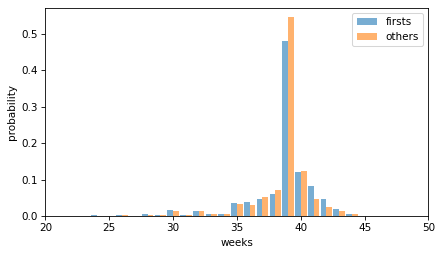

In [94]:
# PMFs for first babies and others, plotted as bar graphs
two_bar_plots(first_pmf, other_pmf)
decorate(xlabel="weeks", ylabel="probability", xlim=[20, 50])

__Interpretation of the bar chart by the book's author:__
- First babies seem to be less likely than others to arrive on time (week 39)
- And more likely to be late (weeks 41 and 42)